In [252]:
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta

import math
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

import ipyvuetify as v
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Label

#from bqplot import pyplot as plt
from IPython.display import display, clear_output

import pickle

import yfinance as yf
#!pip install ffn -q
import ffn

start_date = datetime.today() - timedelta(days=20*365)
end_date = datetime.today()

%matplotlib inline

## Data download

In [253]:
def pickle_save(data, name):
    """Saves dataframe as pickle file"""
    assert type(name) is str
    f = open('data/%s.pkl' %name, 'wb')
    pickle.dump(data, f)
    f.close()
    
def pickle_load(name):
    """Loads dataframe as backup from pickle file"""
    assert type(name) is str
    f = open('data/%s.pkl' %name, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [254]:
def load_etfs(start_date, end_date):
    """
    download data for GLD, TLT and SPY ETFs from yahoo finance;
    save results in pickle file and returns pandas df
    """
        
    try:
        data = ffn.get('GLD:Close, TLT:Close, SPY:Close',\
                       start=start_date, end=end_date)
        data.columns = ['GLD', 'TLT', 'SPY']
        pickle_save(data, 'etf_history')
        print('Download finished')
    
    except AssertionError as error:        
        pickle_load('etf_history')
        print('Problem with download, using backup')
        print(error)
    
    return data

In [255]:
def load_currencies(start_date, end_date):
    """
    download data for EUR, GBP and ARS currencies from yahoo
    finance; save results in pickle file and returns pandas df
    """
    
    try:
        data = yf.download("EURUSD=X GBPUSD=X ARSUSD=X",
                           start_date, end_date)
        data = data.Close
        data.columns = ['ARSUSD', 'EURUSD', 'GBPUSD']
        pickle_save(data, 'ccy_history')
        print('Download finished')
    
    except AssertionError as error:
        pickle_load('ccy_history')
        print('Problem with download, using backup')
        print(error)
    
    return data

In [256]:
def merge_dataframes(dataset1, dataset2):
    return pd.merge_asof(dataset1, dataset2, right_index=True,
                         left_index=True)

In [257]:
df = merge_dataframes(load_etfs(start_date, end_date),
               load_currencies(start_date, end_date))

Download finished
[*********************100%***********************]  3 of 3 downloaded
Download finished


In [258]:
df['GLD_eur'] = df['GLD'] / df['EURUSD']
df['GLD_gbp'] = df['GLD'] / df['GBPUSD']
df['GLD_ars'] = df['GLD'] / df['ARSUSD']

In [259]:
df['GLD_ret'] = df['GLD'].to_log_returns().dropna()
df['TLT_ret'] = df['TLT'].to_log_returns().dropna()
df['SPY_ret'] = df['SPY'].to_log_returns().dropna()

In [260]:
df = df.round(4) 

In [261]:
df.head()

,GLD,TLT,SPY,ARSUSD,EURUSD,GBPUSD,GLD_eur,GLD_gbp,GLD_ars,GLD_ret,TLT_ret,SPY_ret
Date,,,,,,,,,,,,
2004-11-18,44.38,88.97,118.74,0.3406,1.2949,1.8483,34.2729,24.0113,130.2995,NaN,NaN,NaN
2004-11-19,44.78,88.26,117.42,0.3441,1.3039,1.8601,34.3431,24.0740,130.1366,0.0090,-0.0080,-0.0112
2004-11-22,44.95,88.72,117.98,0.3391,1.3040,1.8598,34.4709,24.1693,132.5568,0.0038,0.0052,0.0048
2004-11-23,44.75,88.83,118.16,0.3405,1.3097,1.8690,34.1681,23.9433,131.4244,-0.0045,0.0012,0.0015
2004-11-24,45.05,88.83,118.44,0.3401,1.3178,1.8811,34.1858,23.9488,132.4610,0.0067,0.0000,0.0024


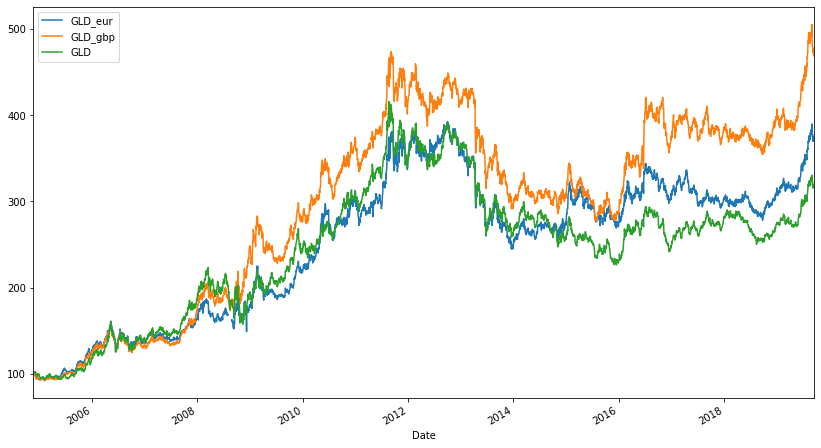

In [283]:
df[['GLD_eur', 'GLD_gbp', 'GLD']].rebase().plot(figsize=(14, 8))

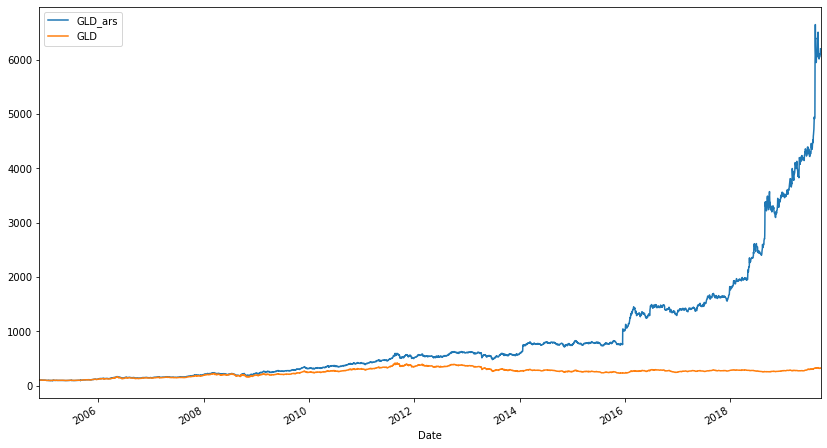

In [282]:
df[['GLD_ars', 'GLD']].rebase().plot(figsize=(14, 8))

In [323]:
data = df[['GLD', 'TLT', 'SPY']]
returns = df[['GLD_ret', 'TLT_ret', 'SPY_ret']].dropna()

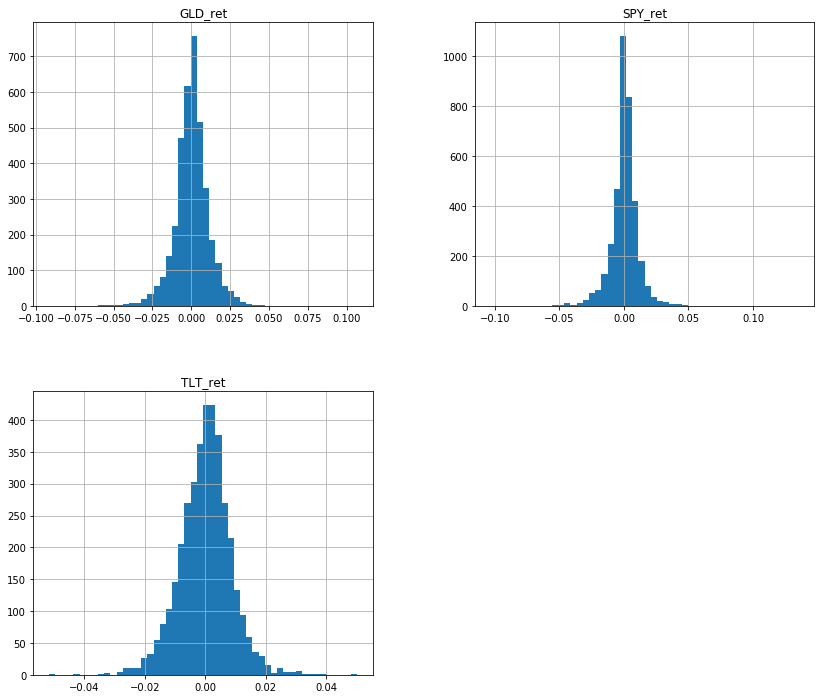

In [329]:
ax = returns.hist(bins = 50, figsize=(14, 12))

In [266]:
perf = data.calc_stats()

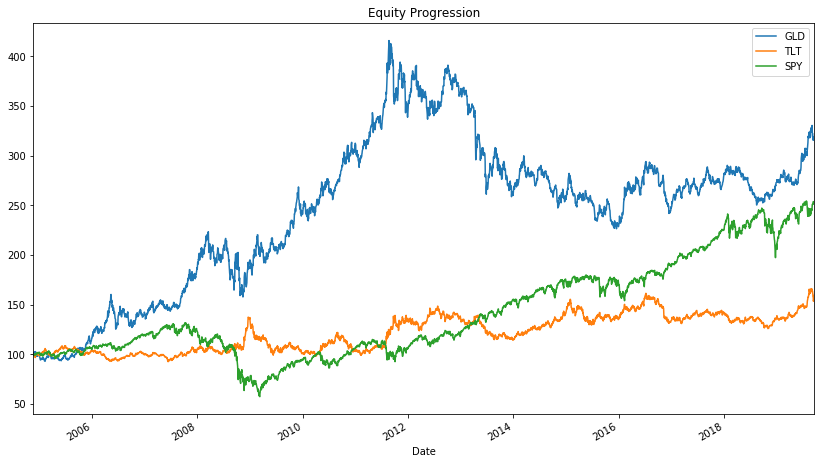

In [281]:
perf.plot(figsize=(14, 8))

In [268]:
perf.display()

Stat                 GLD         TLT         SPY
-------------------  ----------  ----------  ----------
Start                2004-11-18  2004-11-18  2004-11-18
End                  2019-09-20  2019-09-20  2019-09-20
Risk-free rate       0.00%       0.00%       0.00%

Total Return         222.10%     59.48%      151.20%
Daily Sharpe         0.52        0.30        0.43
Daily Sortino        0.84        0.50        0.67
CAGR                 8.20%       3.20%       6.41%
Max Drawdown         -45.56%     -28.46%     -56.47%
Calmar Ratio         0.18        0.11        0.11

MTD                  -0.56%      -3.66%      1.99%
3m                   9.03%       6.77%       0.82%
6m                   15.12%      15.66%      5.94%
YTD                  17.90%      16.77%      19.35%
1Y                   25.10%      21.12%      1.60%
3Y (ann.)            4.45%       1.73%       11.81%
5Y (ann.)            4.12%       4.34%       8.43%
10Y (ann.)           3.81%       3.99%       10.86%
Since Incep.

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


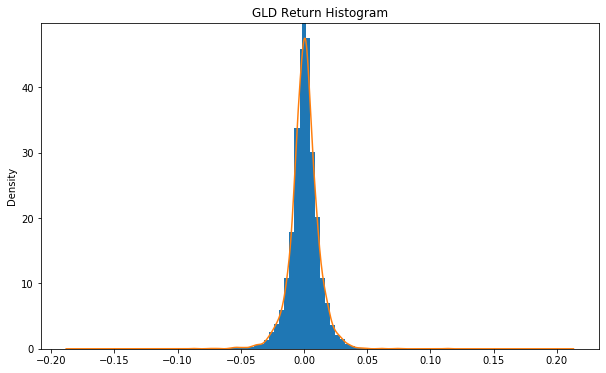

In [45]:
perf[0].plot_histogram(bins=50, figsize=(10, 6));

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


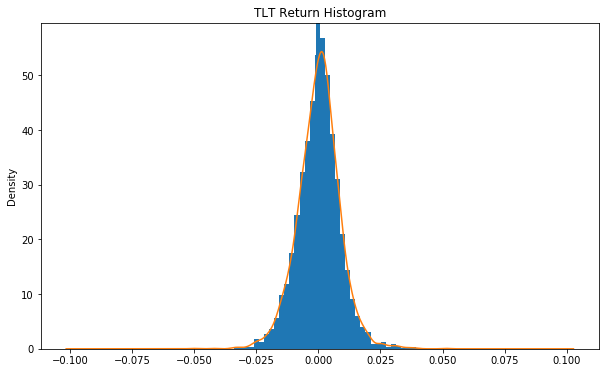

In [46]:
perf[1].plot_histogram(bins=50, figsize=(10, 6));

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


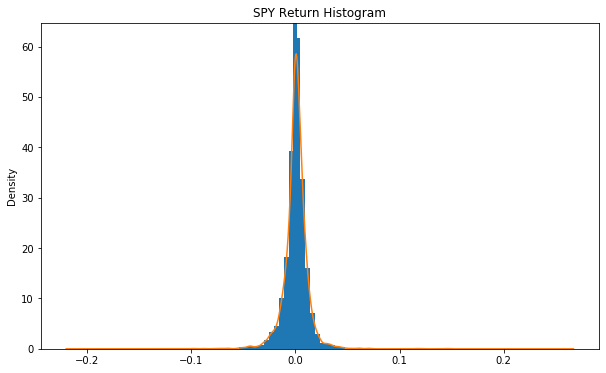

In [47]:
perf[2].plot_histogram(bins=50, figsize=(10, 6));

### QQ plot - test for non-normality of log returns (quantile-quantile plot)
## FAT TAILS

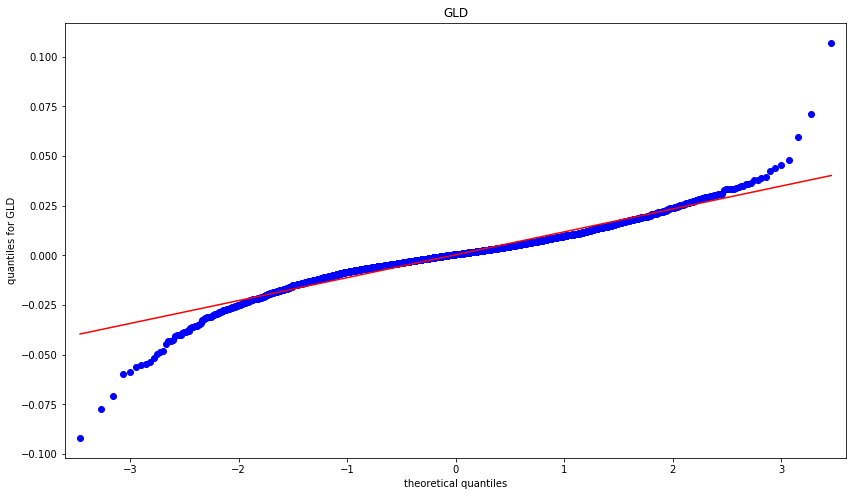

In [286]:
fig, ax = plt.subplots(figsize=(14, 8))
sm.qqplot(df['GLD_ret'].dropna(), line='s', ax=ax)
plt.title('GLD')
plt.xlabel('theoretical quantiles')
plt.ylabel('quantiles for GLD')
plt.show();

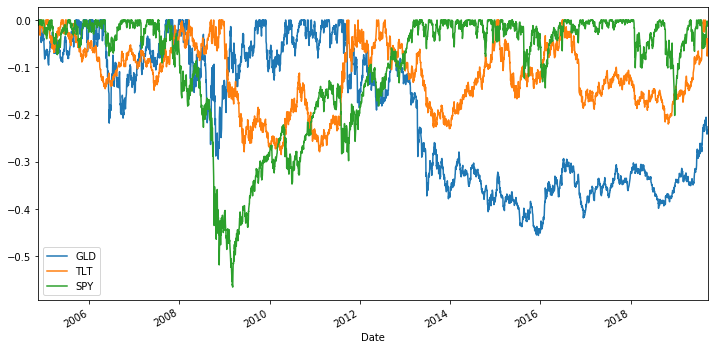

In [270]:
ffn.to_drawdown_series(data).plot(figsize=(12, 6))

## Returns

In [335]:
asset_no = len(returns.columns)

In [330]:
returns.mean() * 252

GLD_ret    0.078995
TLT_ret    0.031544
SPY_ret    0.062015
dtype: float64

In [331]:
returns.cov() * 252

,GLD_ret,TLT_ret,SPY_ret
GLD_ret,0.033429,0.003164,0.000876
TLT_ret,0.003164,0.018538,-0.010365
SPY_ret,0.000876,-0.010365,0.033986


### Weights - start with random

In [350]:
weights = np.random.random(asset_no)
weights /= np.sum(weights)

**expected portfolio return** with given weights for each asset

In [353]:
mu = np.sum(returns.mean() * weights) * 252

**expected portfolio variance**
vectorised solution very efficient - more details Py4Fi

In [354]:
sigma_sq = np.dot(weights.T, np.dot(returns.cov() * 252, weights))

**expected portfolio standard deviation**

In [355]:
sigma = math.sqrt(sigma_sq)

In [356]:
sigma

0.08896607440943455

### Mean-variance portfolio selection with Monte Carlo Simulation

In [357]:
def portfolio_return(weights):
    return np.sum(returns.mean() * weights) * 252

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,
                                            weights)))

In [358]:
p_returns = []
p_volatilities = []
for p in range(3000):
    weights = np.random.random(asset_no)
    weights /= np.sum(weights)
    p_returns.append(portfolio_return(weights))
    p_volatilities.append(portfolio_volatility(weights))
p_returns = np.array(p_returns)
p_volatilities = np.array(p_volatilities)
    

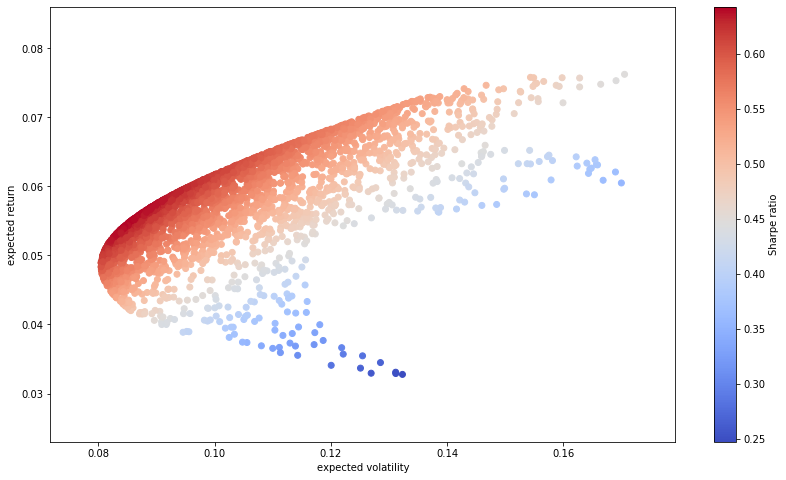

In [364]:
plt.figure(figsize=(14, 8))
plt.scatter(p_volatilities, p_returns, c=p_returns/p_volatilities,
           marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [278]:
returns.calc_mean_var_weights().as_format('.2%')

GLD_ret    28.01%
TLT_ret    36.84%
SPY_ret    35.15%
dtype: object

In [279]:
returns.calc_erc_weights().as_format('.2%')

GLD_ret    24.24%
TLT_ret    42.73%
SPY_ret    33.04%
Name: erc, dtype: object

## rolling correlation?

## rolling sharpe
$SPY $TLT 50/50 portfolio a main roadmap. I track 100, 150 and 200-day Sharpe Ratios on this portfolio. The 150-day hit 5 (annualized), a massive record (since 1995). For those looking for a blow-off move in risk assets, it already happened this year.

https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805 <br>
https://stackoverflow.com/questions/49091044/python-rolling-sharpe-ratio-with-pandas-or-numpy

### Voila app - what are interesting things to manipulate

### histogram
### manipulate weights of portf